<font color=darkorange size=5>**BEFORE RUNNING CODE: Change Hardware Accelerator to GPU to train faster (Runtime -> Change Runtime Type -> Hardware Accelerator -> T4 GPU)**

In [ ]:
# @title # **Run this code cell to set up the notebook!**
# @markdown The data may take some time to load in, so feel free to move on to the next part in the meantime.

project = "histology" # @param ["Choose your dataset!", "bees", "histology", "beans", "malaria"]

import requests
from IPython.display import Markdown, display

import tensorflow_datasets as tfds
from tensorflow.image import resize_with_pad, ResizeMethod

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def ProjectDescription(project):
  display_str =  f"**[{project.capitalize()} Project Background Document]({article_url_dict[project]})** <br />"
  display_str += f"**[{project.capitalize()} Dataset Documentation]({dataset_documentation_url_dict[project]})** <br />"
  display(Markdown(display_str))
  response = requests.get(image_url_dict[project], stream=True)
  img = Image.open(response.raw)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

def plot_metric(history, metric="accuracy", best_is_max=True, start_epoch=0, random_model_metric=None):
  # Get lists of accuracies over the epochs
  training_accuracy = history.history[metric][start_epoch:]
  validation_accuracy = history.history['val_' + metric][start_epoch:]

  # Find best epoch depending on whether max is the best for the metric
  if best_is_max:
    best_epoch = validation_accuracy.index(max(validation_accuracy))
  else:
    best_epoch = validation_accuracy.index(min(validation_accuracy))

  # Plot labels
  plt.title(metric.capitalize() + ' as Model Trains')
  plt.xlabel('Epoch #')
  plt.ylabel(metric.capitalize())

  # Plot lines
  plt.plot(training_accuracy, label='Train')
  plt.plot(validation_accuracy, label='Validation')
  plt.axvline(x=best_epoch, linestyle='--', color='green', label='Best Epoch')

  if random_model_metric is not None:
    plt.axhline(random_model_metric, linestyle='--',color='red', label='Chance')

  # Plot legend and show
  plt.legend()
  plt.show()

# URL dictionaries for the projects
article_url_dict = {
    "beans"     : "https://docs.google.com/document/d/19AcNUO-9F4E9Jtc4bvFslGhyuM5pLxjCqKYV3rUaiCc/edit?usp=sharing",
    "malaria"   : "https://docs.google.com/document/d/1u_iX2oDrEZ1clhFefpP3V8uwAjf7EUV4G6kq_3JDcVY/edit?usp=sharing",
    "histology" : "https://docs.google.com/document/d/162WhUE9KqCgq_I7-VvENZD2n1IVsbeXVRSwfJEkxAqQ/edit?usp=sharing",
    "bees"      : "https://docs.google.com/document/d/1PUB_JuYHi6zyHsWAhkIb7D7ExeB1EfI09arc6Ad1bUY/edit?usp=sharing"
}

image_url_dict = {
    "beans"     : "https://storage.googleapis.com/tfds-data/visualization/fig/beans-0.1.0.png",
    "malaria"   : "https://storage.googleapis.com/tfds-data/visualization/fig/malaria-1.0.0.png",
    "histology" : "https://storage.googleapis.com/tfds-data/visualization/fig/colorectal_histology-2.0.0.png",
    "bees"      : "https://storage.googleapis.com/tfds-data/visualization/fig/bee_dataset-bee_dataset_300-1.0.0.png"
}

download_url_prefix_dict = {
    "histology" : "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Towards%20Precision%20Medicine/",
    "bees"      : "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Safeguarding%20Bee%20Health/"
}

dataset_documentation_url_dict = {
    "beans"     : "https://www.tensorflow.org/datasets/catalog/beans",
    "malaria"   : "https://www.tensorflow.org/datasets/catalog/malaria",
    "bees"      : "https://www.tensorflow.org/datasets/catalog/bee_dataset",
    "histology" : "https://www.tensorflow.org/datasets/catalog/colorectal_histology",
}

# Load dataset
if project == "Choose your dataset!":
  print("Please choose your dataset from the dropdown menu!")

elif project == "beans":
  data,  info = tfds.load('beans', split='train[:1024]', as_supervised=True, with_info=True)
  feature_dict = info.features['label'].names
  images = np.array([resize_with_pad(image, 128, 128, antialias=True) for image,_ in data]).astype(int)
  labels = [feature_dict[int(label)] for image,label in data]

elif project == "malaria":
  data,  info = tfds.load('malaria', split='train[:1024]', as_supervised=True, with_info=True)
  images = np.array([resize_with_pad(image, 256, 256, antialias=True) for image,_ in data]).astype(np.uint8)
  labels = ['malaria' if label==1 else 'healthy' for image,label in data]

else:
  wget_command = f'wget -q --show-progress "{download_url_prefix_dict[project]}'
  !{wget_command + 'images.npy" '}
  !{wget_command + 'labels.npy" '}

  images = np.load('images.npy')
  labels = np.load('labels.npy')

  !rm images.npy labels.npy


# Original preprocessing code for datasets

# if project == "histology":
#   data,  info = tfds.load('colorectal_histology', split='train[:1024]', as_supervised=True, with_info=True)
#   feature_dict = info.features['label'].names
#   images = np.array([image for image,label in data]).astype(int)
#   labels = [feature_dict[int(label)] for image,label in data]

# if project == "bees":
#   data,  info = tfds.load('bee_dataset', split='train[:3200]', as_supervised=True, with_info=True)
#   data = [(image, label) for image,label in data if label['wasps_output']==0]
#   data1 = [(image, label) for image,label in data if label['varroa_output']==0][:500]
#   data2 = [(image, label) for image,label in data if label['varroa_output']==1][:500]
#   data = data1 + data2
#   images = np.array([image for image, _ in data]).astype(int)
#   labels = ['diseased' if label['varroa_output'] else 'healthy' for image,label in data]

images.npy          100%[===================>] 527.34M  77.8MB/s    in 6.5s    
labels.npy          100%[===================>]  28.12K  --.-KB/s    in 0s      


# PART 0: Remaking your model

So that you can focus on advanced techniques in CNNs, we are going to help you out by:
(1) Setting up your features and labels
(2) Splitting up your data into training and testing
(3) Constructing a similar CNN as in the previous notebook

After running the following cell, you will have the variables ```X_train```, ```X_test```, ```y_train```, and ```y_test``` along with your initialized (but untrained!) model, ```cnn_model```.


In return for this favor, you must run a couple sanity checks to make sure the dimensions of your variables, and the number of layers in your model is roughly what you expect!

In [ ]:
#@title Run this cell to construct your model!
#@markdown Feel free to click "Show code" and edit the model with any improvements you may have made in Notebook 2!
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv3D, Flatten

# Using the get_dummies() function to one-hot encode your labels.
labels_ohe = np.array(pd.get_dummies(labels))

# Select your feature (X) and labels (y).
y = labels_ohe
X = images

# Split your data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Initialize your model
cnn_model = Sequential()


# Input layer
cnn_model.add(Input(shape=X_train.shape[1:]))

# First layer
cnn_model.add(Conv2D(8, (3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

# Second layer
cnn_model.add(Conv2D(16, (3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

# Third layer
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

# # Fourth layer
cnn_model.add(Conv2D(64, (3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))


# Flattening layer
cnn_model.add(Flatten())

# Hidden (dense) layer with 32 nodes, and relu activation function.
cnn_model.add(Dense(32, activation='relu'))

# Final output layer that uses a softmax activation function.
cnn_model.add(Dense(len(set(labels)), activation='softmax'))

# Compile your model
metrics_to_track = ['categorical_crossentropy', 'accuracy']
cnn_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=metrics_to_track)



### Exercise 0A

Examine your data to ensure our preprocessing worked as intended.

Print the dimensions of ```X_test```, ```y_test```, ```X_train``` and ```y_train```.



In [ ]:
### YOUR CODE HERE ###
print('Dim X_train:', X_train.shape)
print('Dim y_train:', y_train.shape)
print('Dim X_test:', X_test.shape)
print('Dim y_test:', y_test.shape)

Dim X_train: (819, 150, 150, 3)
Dim y_train: (819, 8)
Dim X_test: (205, 150, 150, 3)
Dim y_test: (205, 8)


### Exercise 0B
Visualize the first 3 images in both ```X_train``` and ```X_test```.

X_train


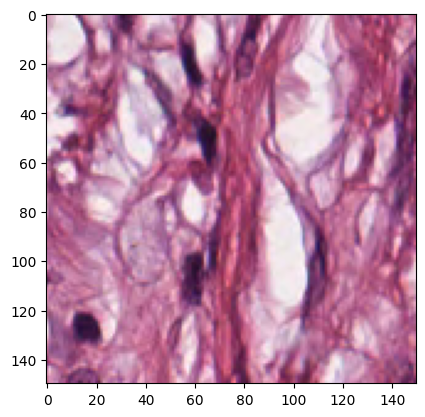

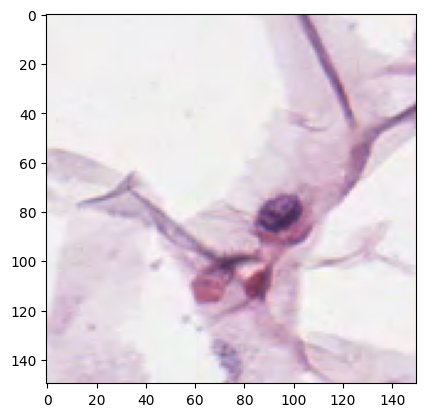

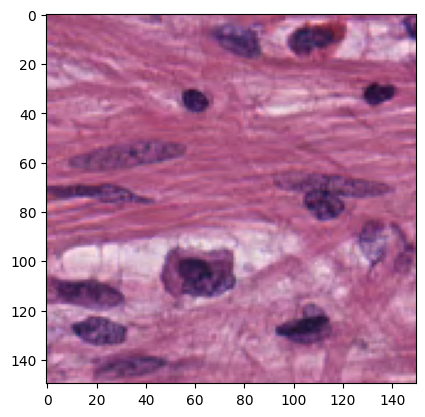

X_test


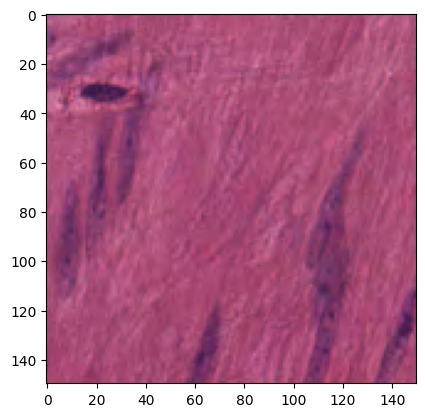

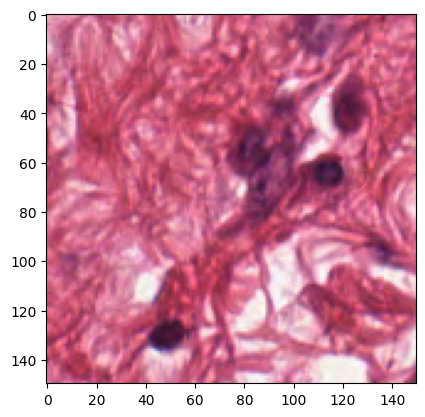

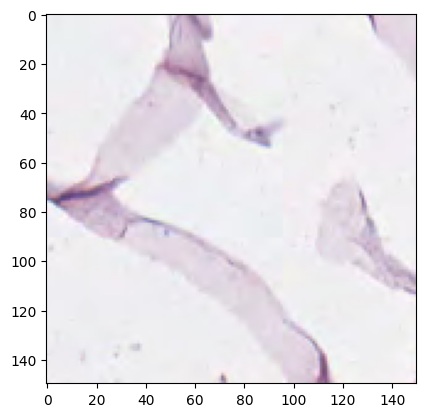

In [ ]:
### YOUR CODE HERE ###
print("X_train")
for i in range(3):
  plt.imshow(X_train[i])
  plt.show()

print("X_test")
for i in range(3):
  plt.imshow(X_test[i])
  plt.show()

### Exercise 0C
Print the first 3 values of y_train and y_test, along with their categorical labels. We've given you a function to help transform the one-hot-encoded labels back into categories.

In [ ]:
one_hot_encoding_to_label_dict = {np.argmax(ohe):label for ohe, label in zip(labels_ohe, labels)}


# This function takes in a vector, and outputs the label.
def ScoreVectorToPredictions(prob_vector):
  class_num = np.argmax(prob_vector) # Find which element in the vector has the highest score.
  class_name = one_hot_encoding_to_label_dict[class_num] # Figure out the label that corresponds to this element.
  return class_name, max(prob_vector) # Return the label as well as the probabilty that the model assigned to this prediction.

print("y_train")
for i in range(3):
  print(ScoreVectorToPredictions(y_train[i]))

print("y_test")
for i in range(3):
  print(ScoreVectorToPredictions(y_test[i]))

### YOUR CODE HERE ###

y_train
('stroma', True)
('adipose', True)
('stroma', True)
y_test
('stroma', True)
('debris', True)
('adipose', True)


## Exercise 0D

Use the `.summary()` method to look at the architecture of your model. How many convolutional layers does your model contain? How many total parameters/weights will it be learning?

In [ ]:
### YOUR CODE HERE ###
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         165,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 190,712 (744.97 KB)

 Trainable params: 190,712 (744.97 KB)

 Non-trainable params: 0 (0.00 B)

### Exercise 0D

Retrain your model using your training data. Train your model for 10 epochs. Be sure to include the testing data as your `validation_data` and plot the model training history using `plot_metric()`.

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 266ms/step - accuracy: 0.1973 - categorical_crossentropy: 24.3651 - loss: 24.3651 - val_accuracy: 0.2049 - val_categorical_crossentropy: 1.9075 - val_loss: 1.9075
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2320 - categorical_crossentropy: 1.7514 - loss: 1.7514 - val_accuracy: 0.1463 - val_categorical_crossentropy: 1.9251 - val_loss: 1.9251
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2331 - categorical_crossentropy: 2.0903 - loss: 2.0903 - val_accuracy: 0.2976 - val_categorical_crossentropy: 1.6571 - val_loss: 1.6571
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3388 - categorical_crossentropy: 1.6421 - loss: 1.6421 - val_accuracy: 0.2439 - val_categorical_crossentropy: 1.7628 - val_loss: 1.7628
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4345 - categorical_crossentropy: 1.4442 - loss: 1.4442 - val_accuracy: 0.3561 - val_categorical_crossentropy: 1.8478 - val_loss

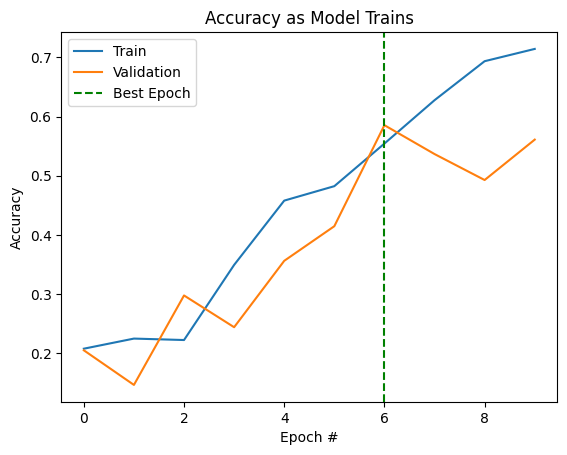

In [ ]:
### YOUR CODE HERE ###
history = cnn_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test), epochs = 10)
plot_metric(history)

# PART I: Data Augmentation



In data augmentation, we can use the images we already have to create more data. For example, we could blur, change the colors, or rotate images to simulate a new image of a dress, shoe, or shirt (or whatever type of images you are working with) that the model could theoretically encounter.

<img src="http://ai.stanford.edu/blog/assets/img/posts/2020-04-20-data-augmentation/thumbnail.png" width=500>

### Exericse 1A

Write a function to transform the first image of your dataset by flipping it  upside down. You can use the ```flipud()``` function.  Then take a look at the original and augmented image.

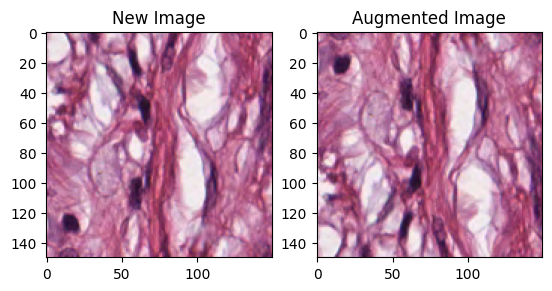

In [ ]:
from numpy import flipud

## A function to create an augmented image from an original.
def createAugmentedImage(original_image):
  new_image = flipud(original_image) ##### YOUR CODE HERE ########
  return new_image

# Transform the first image of your dataset using your new function.
new_image = createAugmentedImage(X_train[0])

# Let's see how your augmented image compares to the original!
# We've filled this part in for you.
f, ax = plt.subplots(ncols=2)
ax[0].imshow(X_train[0])
ax[0].set_title('New Image')
ax[1].imshow(new_image)
ax[1].set_title('Augmented Image')
plt.show()

### Exercise 1B

Using the first 100 images in your training dataset, and your ```createAugmentedImage()``` function, create an augmented dataset.  

You'll need to also get the associated labels for your augmented dataset. (Note: do not augment the y-values/labels at all, we want these to stay the same!)


In [ ]:
for i in range(100):
  new_X = createAugmentedImage(X_train[i]) ### YOUR CODE HERE - What will you do to each image?
  new_y = y_train[i] ### YOUR CODE HERE

  if i == 0:
    X_train_augment = [new_X]
    y_train_augment = [new_y]
  else:
    X_train_augment = np.append(X_train_augment, [new_X], axis=0)
    y_train_augment = np.append(y_train_augment, [new_y], axis=0)


print("Dimensions of augmented X:", X_train_augment.shape)
print("Dimensions of y:", y_train_augment.shape)

Dimensions of augmented X: (100, 150, 150, 3)
Dimensions of y: (100, 8)


## Exercise 1C

Train your model (```cnn_model```) for 5 additional epochs using your new augmented dataset.

Use your testing data as validation to look at model performance as it trains.

Note: you do not need to start over with training, just start from where the model left off.

Does the augmented dataset improve performance? Why or why not?

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 680ms/step - accuracy: 0.5054 - categorical_crossentropy: 2.3761 - loss: 2.3761 - val_accuracy: 0.4829 - val_categorical_crossentropy: 1.3087 - val_loss: 1.3087
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5179 - categorical_crossentropy: 1.1347 - loss: 1.1347 - val_accuracy: 0.3415 - val_categorical_crossentropy: 2.2946 - val_loss: 2.2946
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6528 - categorical_crossentropy: 1.1631 - loss: 1.1631 - val_accuracy: 0.3854 - val_categorical_crossentropy: 1.8630 - val_loss: 1.8630
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4571 - categorical_crossentropy: 1.2390 - loss: 1.2390 - val_accuracy: 0.5610 - val_categorical_crossentropy: 1.0739 - val_loss: 1.0739
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8721 - categorical_crossentropy: 0.4332 - loss: 0.4332 - val_accuracy: 0.5854 - val_categorical_crossentropy: 1.3538 - val_loss: 1.3538


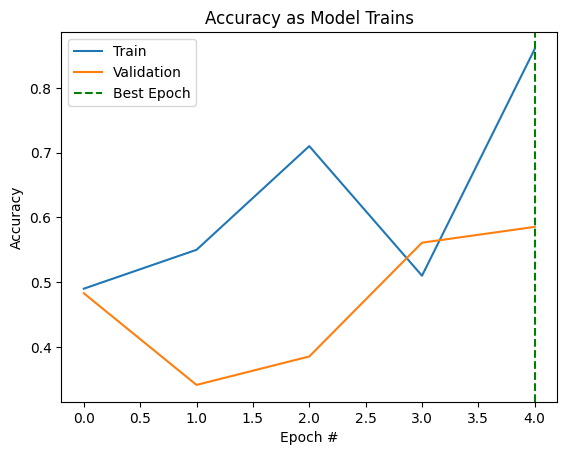

In [ ]:
### YOUR CODE HERE ###
additional_history = cnn_model.fit(X_train_augment, y_train_augment, validation_data=(X_test, y_test), epochs=5)
plot_metric(additional_history)

# PART II: Transfer Learning




<img src="https://upload.wikimedia.org/wikipedia/commons/a/ab/Transfer_Learning.png" width=500>

No matter what the image classification task, we expect certain **geometric features** to be important - lines, edges, shapes, etc. We also expect convolutional neural networks to learn to recognize these shapes (most likely in the earlier layers) throughout their training. Therefore, we might be able to re-use the layers/weights (that presumably encode for recognizing lines, edges, etc.) that one image classification task has learned to perform another.

Many groups have published large neural networks trained on millions of images for classification tasks - Resnet, AlexNet, and MobileNet are a few famous ones. In order to perform transfer learning we can
1. Download one of these pretrained models - their weights have already been learned.
2. Change the output layer to have the number of nodes appropriate for our classification task (# of classes). Optionally, change the structure of any additional later layers you might want to alter.
3. Freeze the weights of most of the layers, especially the initial first few layers. This is an option you can specify before training the model, and will prevent model training from changing any of those weights. Don't freeze the last layer.
4. Alter your training images so that they are the right size for the input size of the downloaded neural network.
5. Train the model on your images/labels!


## 📶 Initialize a pre-trained model

### Exercise 2A

For our transfer learning, we're going to use 'experts' built upon the famous 'ImageNet' classification problem.

In ImageNet, participants were challenged to build machine learning models that could distinguish 14 million images' categories, where there were > 20,000 categories available.

Below, we see examples of 3 different categories.

![](https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/ImageNet.jpg)

This model will already have some object recognition expertise baked into it! We'll utilize this expertise by loading in this model, and we'll adapt it to our problem by replacing the last layer with a layer that we'll train ourselves.


Run the next cell to perform step 1, intializing one this large model.

Additionally, look at the summary of the model and answer:
- What is the input size of the images that VGG16 can classify?
- How many different categories of images does VGG16 classify?
- How many different weights (parameters) did VGG16 learn when it was originally trained?

In [ ]:
# Run this cell to import pretrained MobileNet
from keras.applications import MobileNetV2, VGG16
mobile_net = VGG16(include_top=True)
mobile_net.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## 🧰 Modifying the output layer size

### Exercise 2B

Perform Step (2), rewiring the network to have an output layer with the # of nodes appropriate for our classification task.

After doing this, look at the final layer in your model. Does it have the number of neurons that you would like?

In [ ]:
from keras import Model


# Make a final layer. Use a Dense() layer, with the size as
# the number of of classes you want to predict!
# Also set the activation function to softmax.
new_output_layer = Dense(len(y_train[0]), activation='softmax') ### REPLACE THIS LINE ###


# Rewire the model so that the new output layer
# The syntax here can be a little confusing, so we've helped you out.
output = new_output_layer(mobile_net.layers[-2].output)
input = mobile_net.input
transfer_cnn = Model(input, output)


# print the summary
transfer_cnn.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,293,320 (512.29 MB)

 Trainable params: 134,293,320 (512.29 MB)

 Non-trainable params: 0 (0.00 B)

## 🧊 Freezing the weights

### Exercise 2C

Next, freeze the weights for all of the layers except for the final layer. You can do this by setting
```layer.trainable=False``` where ```layer``` is the layer you are interested in freezing (``trainable=False``) or unfreezing (``trainable=True``) the weights of.

Additionally, compile your model and look at its summary.
 Now, how many trainable parameters (weights) are there compared to before?

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for layer in transfer_cnn.layers:
    layer.trainable = False ### YOUR CODE HERE - Make sure all layers are >>>NOT<<<< trainable

## Set the final layer as trainable=True
### YOUR CODE HERE ###
transfer_cnn.layers[-1].trainable = True

# Compile your new model using loss='categorical_crossentropy'
# optimizer='adam' and metrics=['accuracy', 'categorical_crossentropy']
### YOUR CODE HERE ####
transfer_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'categorical_crossentropy'])

# Look at the summary of the network to make sure the structure is as you expect!
transfer_cnn.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,293,320 (512.29 MB)

 Trainable params: 32,776 (128.03 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

## ✂ Resize your images

### Exercise 2D

Resize your images so that they are the appropriate size for the input layer of your model. You can use the function we have given you, which takes in a set of ```images``` and resizes them to have the appropriate ```heights``` and ```weights```.



In [ ]:
# Takes in an image, a new height, and a new width
# and resizes the image, plus converts from greyscale to 3 RGB color channels.
def ResizeImages(images, height, width):
  return np.array([resize_with_pad(image, height, width, antialias=True) for image in images]).astype(int)

# Resize your image
X_train_resized = ResizeImages(X_train, 224, 224) ### REPLACE THIS LINE
X_test_resized = ResizeImages(X_test, 224, 224) ### REPLACE THIS LINE

# Make sure your images are the right dimensions
print("Dim X_train_resized:", X_train_resized.shape)
print("Dim X_test_resized:", X_test_resized.shape)

Dim X_train_resized: (819, 224, 224, 3)
Dim X_test_resized: (205, 224, 224, 3)


bold text## Finetune the model using your data

### Exercise 2E

Finally, train your model using your data. Because this model takes a while to train, just train for 3 epochs.

Use your testing data as validation to look at model performance as it trains.

Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5122 - categorical_crossentropy: 1.4582 - loss: 1.4582 - val_accuracy: 0.7951 - val_categorical_crossentropy: 0.5966 - val_loss: 0.5966
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.8720 - categorical_crossentropy: 0.3796 - loss: 0.3796 - val_accuracy: 0.7854 - val_categorical_crossentropy: 0.5394 - val_loss: 0.5394
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.8800 - categorical_crossentropy: 0.3170 - loss: 0.3170 - val_accuracy: 0.8341 - val_categorical_crossentropy: 0.4775 - val_loss: 0.4775


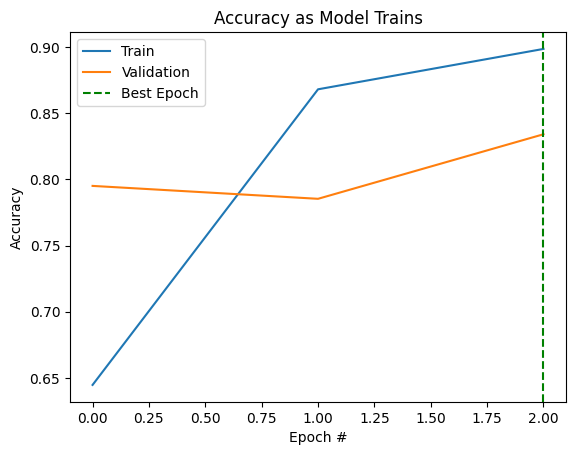

In [ ]:
### YOUR CODE HERE ###
history = transfer_cnn.fit(X_train_resized, y_train, validation_data=(X_test_resized, y_test), epochs=3)

plot_metric(history)